## Visualization of simulation data and comparison
### visualization with PyVista for presentations


In [1]:
### load module
%matplotlib notebook
#import instaseis
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd
import seissolxdmf 

from pythonXdmfReader.pythonXdmfReader import *
import pyproj
import scipy.io as sio
import matplotlib.tri as tri
import matplotlib.image as mpimg

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# from mpl_toolkits.basemap import Basemap
from scipy import spatial
from netCDF4 import Dataset

import seaborn as sns

c_blue=['#2878B5','#9AC9DB'];
c_red=['#C82423','#F8AC8C','#FF8884'];
c_gre=['#96C37D','#8ECFC9'];
c_pur=['#8B8EFE','#C497B2'];

colors2=sns.color_palette("rocket",8);
print('load modulus')

load modulus


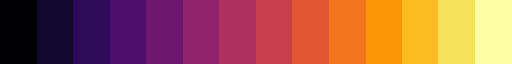

In [2]:
import palettable.matplotlib as cmapa
from palettable.cmocean import sequential as cmapb

from matplotlib.colors import ListedColormap

Cmap = ListedColormap(cmapa.Inferno_14.mpl_colors)
Cmap



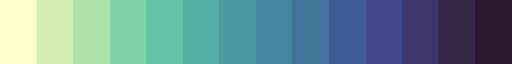

In [3]:
Cmap2 = ListedColormap(cmapb.Deep_14.mpl_colors)
Cmap2

In [4]:
# load surface static GPS displacement and compare

lla = pyproj.Proj(proj='latlong', ellps='WGS84', datum='WGS84')
myproj = pyproj.Proj( init='EPSG:5936',ellps='WGS84', datum='WGS84')

gpsfolder='GPS/'
stall = np.loadtxt(gpsfolder+'/gnss_station2.txt')
staxyz = pyproj.transform(lla, myproj, stall[:,0],stall[:,1], stall[:,1], radians=False)

# stall2 = np.loadtxt('vno_stations2.dat')
# staxyz2= pyproj.transform(lla, myproj, stall2[:,1],stall2[:,0], stall2[:,1], radians=False)

## plot mapview of GPS records
coastf = 'coastline/alaska.mat'
coast = sio.loadmat(coastf)

hypoll = np.loadtxt('hypocenters/hypocenters.dat')

hypoxyz =  pyproj.transform(lla, myproj,hypoll[:,0],hypoll[:,1],radians=False)

trch = np.loadtxt('GMT/trench_ala.gmt',skiprows=1)


/home/dli/anaconda3/envs/obspy/lib/python3.8/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/tmp/ipykernel_4883/4275696250.py:8: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  staxyz = pyproj.transform(lla, myproj, stall[:,0],stall[:,1], stall[:,1], radians=False)
/tmp/ipykernel_4883/4275696250.py:19: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  hypoxyz =  pyproj.transform(lla, myproj,hypoll[:,0],hypoll[:,1],radians=False)


In [5]:
fnet = Dataset('Kinematic/2021_Chignik_FFM_slip_grd.nc','r')
# print(fnet.variables)
lon_2022 = fnet['lon']
lat_2022 = fnet['lat']
slip_2022 = fnet['z'][:,:]

data = sio.loadmat('Kinematic/usgs_slip.mat')
lon_usgs= data['data']['lon'][0,0]
lat_usgs= data['data']['lat'][0,0]
slip_usgs= data['data']['slip'][0,0]
# print(slip_2022.shape)

hypoll = np.loadtxt('hypocenters/hypocenters.dat')
hypoll4 = np.loadtxt('hypocenters/hypocenters4.dat')
hypoll7 = np.loadtxt('hypo1938.dat')

c1 = np.loadtxt('Elliott2022/contour_1.txt')
c2 = np.loadtxt('Elliott2022/contour_2.txt')
c3 = np.loadtxt('Elliott2022/contour_3.txt')
c4 = np.loadtxt('Elliott2022/contour_4.txt')
c5 = np.loadtxt('Elliott2022/contour_5.txt')

# 1938 rupruture area based on Freymueller2021
rup1 = np.loadtxt('rupture1938.txt',skiprows=1)

hypo2 = np.loadtxt('hypocenters/hypocenters2.dat')




In [1]:
360.0-1.611005e+02


198.8995

In [6]:
# load USGS  fault slip model
# modelname = 'tp17n222'
# modelname = 'tp20n410'
# modelname = 'rup18b'

# modelname = 'rup43b'
# foldername = 'result1938/'

modelname = 'alkR057-TP72f'
foldername = 'resultNew/'

# print(slip_usgs.shape
lla = pyproj.Proj(proj='latlong', ellps='WGS84', datum='WGS84')
myproj = pyproj.Proj( init='EPSG:5936',ellps='WGS84', datum='WGS84')

xdmfFilename = foldername + modelname+'-fault.xdmf'
ndt = ReadNdt(xdmfFilename)

# ndt=90
xyz = ReadGeometry(xdmfFilename)
connect = ReadConnect(xdmfFilename)

flonlat =  pyproj.transform(myproj,lla,xyz[:,0],xyz[:,1],radians=False)
triang = tri.Triangulation(flonlat[0],flonlat[1],connect)

asl= LoadData(xdmfFilename,'ASl',connect.shape[0],idt=ndt-2,oneDtMem=True,firstElement=-1)
tmp= LoadData(xdmfFilename,'Tmp',connect.shape[0],idt=ndt-2,oneDtMem=True,firstElement=-1)
# pf= LoadData(xdmfFilename,'P_f',connect.shape[0],idt=ndt-2,oneDtMem=True,firstElement=-1)
# pn0= LoadData(xdmfFilename,'Pn0',connect.shape[0],idt=0,oneDtMem=True,firstElement=-1)
# td0 =LoadData(xdmfFilename,'Td0',connect.shape[0],idt=0,oneDtMem=True,firstElement=-1)
# ts0 =LoadData(xdmfFilename,'Ts0',connect.shape[0],idt=0,oneDtMem=True,firstElement=-1)


centerx = 1/3*(flonlat[0][connect[:,0]]+ flonlat[0][connect[:,1]] + flonlat[0][connect[:,2]])
centery = 1/3*(flonlat[1][connect[:,0]]+ flonlat[1][connect[:,1]] + flonlat[1][connect[:,2]])


/home/dli/anaconda3/envs/obspy/lib/python3.8/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/tmp/ipykernel_4883/2809411746.py:23: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  flonlat =  pyproj.transform(myproj,lla,xyz[:,0],xyz[:,1],radians=False)


In [3]:
## plot 


In [20]:
# plot initial parameters
pn0= LoadData(xdmfFilename,'Pn0',connect.shape[0],idt=0,oneDtMem=True,firstElement=-1)
td0 =LoadData(xdmfFilename,'Td0',connect.shape[0],idt=0,oneDtMem=True,firstElement=-1)
ts0 =LoadData(xdmfFilename,'Ts0',connect.shape[0],idt=0,oneDtMem=True,firstElement=-1)

S = ((0.6*-pn0[0])-td0[0])/((0.1*pn0[0])+td0[0])
# presstress ratio
r0 = (np.sqrt(td0[0]**2+ts0[0]**2)+0.1*pn0[0])/(-0.5*pn0[0])




In [7]:
#%%
sr0= LoadData(xdmfFilename,'SRd',connect.shape[0],idt=1,oneDtMem=True,firstElement=-1)
sr1 =LoadData(xdmfFilename,'SRd',connect.shape[0],idt=2,oneDtMem=True,firstElement=-1)
sr2= LoadData(xdmfFilename,'SRd',connect.shape[0],idt=3,oneDtMem=True,firstElement=-1)
sr3 =LoadData(xdmfFilename,'SRd',connect.shape[0],idt=4,oneDtMem=True,firstElement=-1)
sr4= LoadData(xdmfFilename,'SRd',connect.shape[0],idt=5,oneDtMem=True,firstElement=-1)
sr5 =LoadData(xdmfFilename,'SRd',connect.shape[0],idt=6,oneDtMem=True,firstElement=-1)
sr6= LoadData(xdmfFilename,'SRd',connect.shape[0],idt=7,oneDtMem=True,firstElement=-1)
sr7 =LoadData(xdmfFilename,'SRd',connect.shape[0],idt=8,oneDtMem=True,firstElement=-1)
sr8 =LoadData(xdmfFilename,'SRd',connect.shape[0],idt=9,oneDtMem=True,firstElement=-1)
sr9 =LoadData(xdmfFilename,'SRd',connect.shape[0],idt=10,oneDtMem=True,firstElement=-1)
sr10 =LoadData(xdmfFilename,'SRd',connect.shape[0],idt=11,oneDtMem=True,firstElement=-1)

asl0= LoadData(xdmfFilename,'ASl',connect.shape[0],idt=1,oneDtMem=True,firstElement=-1)
asl1 =LoadData(xdmfFilename,'ASl',connect.shape[0],idt=2,oneDtMem=True,firstElement=-1)
asl2= LoadData(xdmfFilename,'ASl',connect.shape[0],idt=3,oneDtMem=True,firstElement=-1)
asl3 =LoadData(xdmfFilename,'ASl',connect.shape[0],idt=4,oneDtMem=True,firstElement=-1)
asl4= LoadData(xdmfFilename,'ASl',connect.shape[0],idt=5,oneDtMem=True,firstElement=-1)
asl5 =LoadData(xdmfFilename,'ASl',connect.shape[0],idt=6,oneDtMem=True,firstElement=-1)
asl6= LoadData(xdmfFilename,'ASl',connect.shape[0],idt=7,oneDtMem=True,firstElement=-1)
asl7 =LoadData(xdmfFilename,'ASl',connect.shape[0],idt=8,oneDtMem=True,firstElement=-1)
asl8 =LoadData(xdmfFilename,'ASl',connect.shape[0],idt=9,oneDtMem=True,firstElement=-1)
asl9 =LoadData(xdmfFilename,'ASl',connect.shape[0],idt=10,oneDtMem=True,firstElement=-1)
asl10 =LoadData(xdmfFilename,'ASl',connect.shape[0],idt=11,oneDtMem=True,firstElement=-1)



In [9]:
import pyvista as pv
import meshio

# points data
hypos = np.array([[1433876.981729,-1927697.024263,-30782.235925],
                       [1603439.276990, -1914489.967751,-15679.983462]])

print(hypos)
PointCloud = pv.PolyData(hypos)

#####################
coastf = 'coastline/alaska.mat'
coast = sio.loadmat(coastf)
trch = np.loadtxt('GMT/trench_ala.gmt',skiprows=1)

index = np.where((trch[:,0]>-164) & (trch[:,0] < -151))
trch_ala= trch[index[0]]

index2 = np.where((coast['data'][:,0]>-164 ) &  (coast['data'][:,0]< -152 ) & (coast['data'][:,1] > 53 ) & (coast['data'][:,1] < 59 ) )
coast_ala = coast['data'][index2[0]]


coast_xyz =  pyproj.transform(lla,myproj,coast_ala[:,0],coast_ala[:,1],radians=False)
trch_xyz =  pyproj.transform(lla,myproj,trch_ala[:,0],trch_ala[:,1],radians=False)

# print(coast_xyz,trch_xyz)

coastxyz = np.array([coast_xyz[0],coast_xyz[1],coast_xyz[0]-coast_xyz[0]])
trchxyz = np.array([trch_xyz[0],trch_xyz[1],trch_xyz[1]-trch_xyz[1]])

PointCoast = pv.PolyData(coastxyz.transpose())
PointTrch = pv.PolyData(trchxyz.transpose())

print(coastxyz.shape)

[[ 1433876.981729 -1927697.024263   -30782.235925]
 [ 1603439.27699  -1914489.967751   -15679.983462]]
(3, 12364)


/tmp/ipykernel_4883/860970073.py:23: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  coast_xyz =  pyproj.transform(lla,myproj,coast_ala[:,0],coast_ala[:,1],radians=False)
/tmp/ipykernel_4883/860970073.py:24: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  trch_xyz =  pyproj.transform(lla,myproj,trch_ala[:,0],trch_ala[:,1],radians=False)


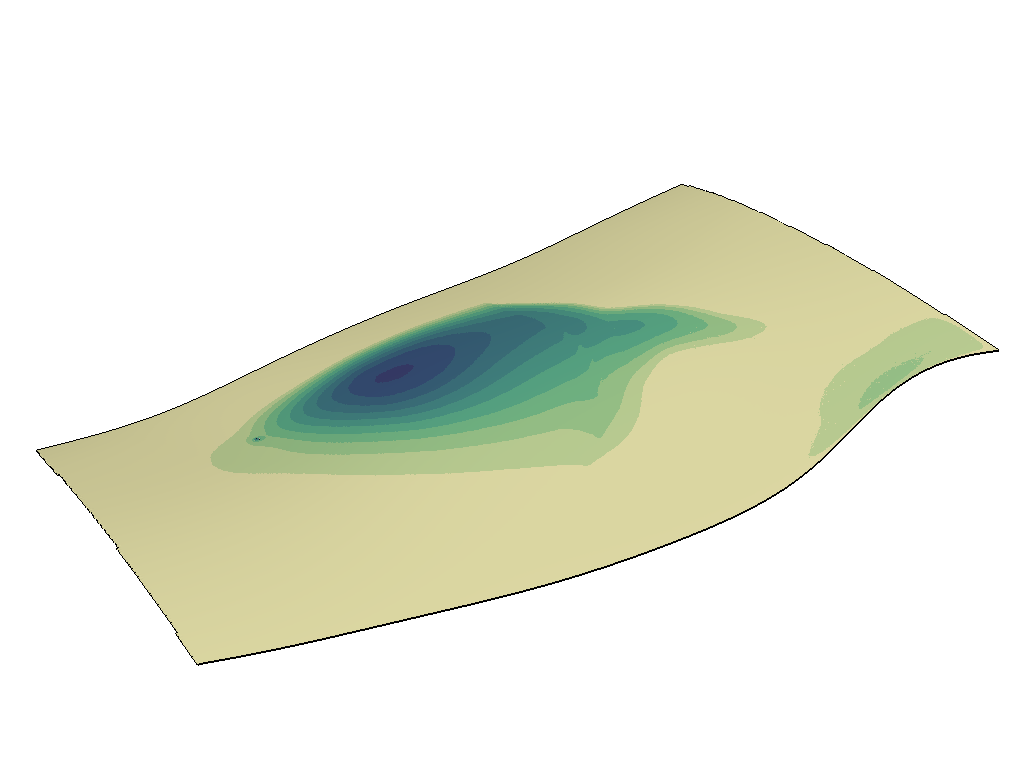

In [18]:

# create mesh file

FaultMeshPath = "./FltMesh_" + modelname + ".vtk"

# modelname = 'rup9'

xdmfFilename = foldername  +  '/'+  modelname +'-fault.xdmf'

TrialFault_xyz = ReadGeometry(xdmfFilename)
TrialFault_connect = ReadConnect(xdmfFilename)


FaultMesh = meshio.write_points_cells(FaultMeshPath, TrialFault_xyz, [("triangle",TrialFault_connect)])
# del FaultMesh

# Load fault mesh onto pyvista
TrialFaultMesh = pv.read(FaultMeshPath)

# extract edge of fault mesh for plotting.
fault_edges = TrialFaultMesh.extract_feature_edges(boundary_edges=True,feature_edges=True,feature_angle=30)
fault_edges.clear_data() 

TrialFaultMesh["fault slip (m)"] = asl[0]
TrialFaultMesh["solid"] = asl[0]-asl[0]

cscale = [0,8.0]


pl = pv.Plotter()
# pl.add_mesh(TrialFaultMesh)
pl.add_mesh(TrialFaultMesh,scalars="fault slip (m)", clim=cscale, cmap = Cmap2, show_scalar_bar=False)
pl.add_mesh(fault_edges,color='black',line_width=1.5)
# edges.plot(line_width=10)

# pl.add_mesh(PointCloud,color='red')
# pl.add_mesh(PointCoast,color='gray')
# pl.add_lines(trchxyz.transpose(),connected=True,color='black')

pl.camera.view_angle = 18
pl.camera.azimuth = -140.0
pl.camera.zoom(1.05)
# pl.reset_camera(bounds=[])
pl.show(screenshot='fig-asl-' + modelname +'.png',jupyter_backend="static")

asl_onfault = pl.image

In [12]:
# print(fault_edges)
# fault_edges.save('fault_edge.vtk')

<IPython.core.display.Javascript object>


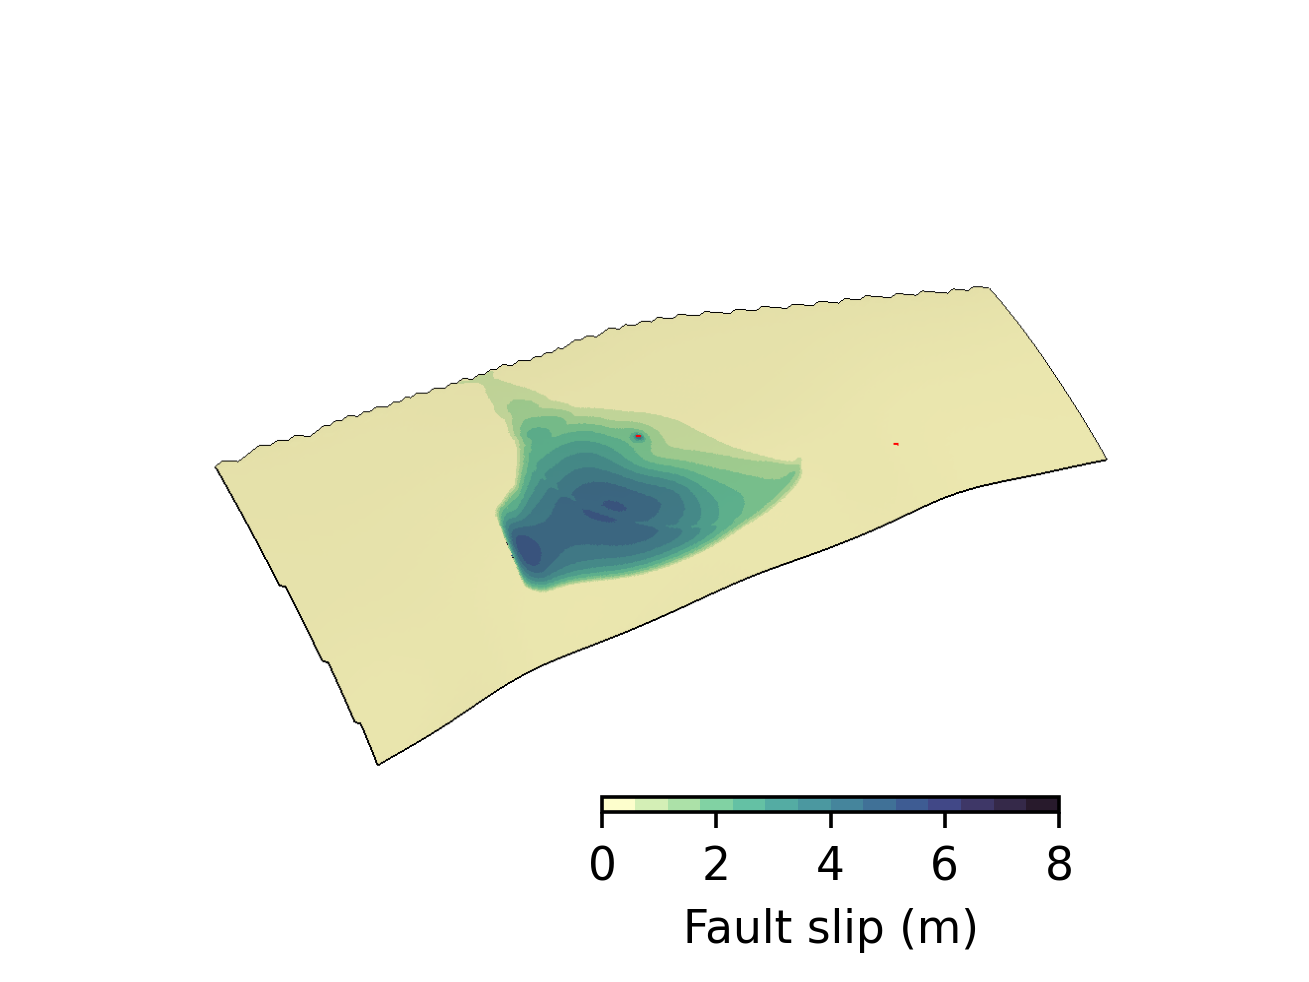

In [79]:
fig = plt.figure(figsize = (4,3),dpi=300)

ax1 = fig.add_subplot(1,1,1)
FaultImage = ax1.imshow(asl_onfault,aspect='auto',cmap=Cmap2,clim=cscale)
ax1.axis('off')

axins1 = inset_axes(ax1,width='50%',height='3%',
                    loc='lower left',bbox_to_anchor=(0.41, 0.05, 0.9,0.7),bbox_transform=ax1.transAxes)

fig.colorbar(FaultImage,shrink=0.3,cax=axins1,orientation="horizontal")

axins1.set_xlabel('Fault slip (m)')
axins1.set_xlim([0,8])
axins1.set_xticks([0,2,4,6,8])

fig.savefig('fig2-asl-' + modelname +'.png',dpi=300)

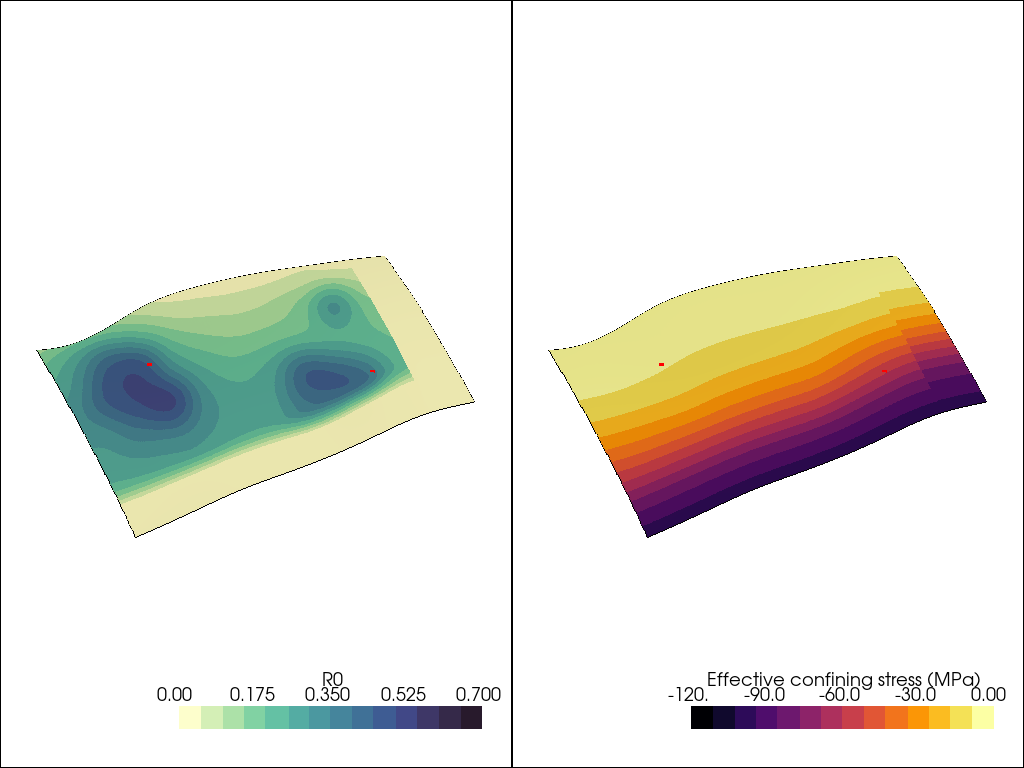

In [23]:
TrialFaultMesh["T"] = tmp[0] - 483
TrialFaultMesh["R0"] = r0
TrialFaultMesh["Effective confining stress (MPa)"] = pn0[0]/1e6
TrialFaultMesh["d_c (m)"] = 0.7-r0 -0.1

pl = pv.Plotter(shape=(1, 2))

cscale = [0.0,.70]

pl.add_mesh(TrialFaultMesh,scalars="R0", clim=cscale, cmap = Cmap2)
pl.add_mesh(fault_edges,color='black')

pl.add_mesh(PointCloud,color='red')


pl.camera.view_angle = 25
pl.camera.azimuth = 45.0

cscale = [-120,0]

pl.subplot(0, 1)
pl.add_mesh(TrialFaultMesh.copy(),scalars="Effective confining stress (MPa)", clim=cscale, cmap = Cmap)
pl.add_mesh(fault_edges,color='black')

pl.add_mesh(PointCloud,color='red')

pl.camera.view_angle = 25
pl.camera.azimuth = 45.0


# ##################################################################################################################
# _ = pl.add_axes(line_width=1)
# actor = pl.add_text("Strike: {}, Dip: {}, Rake: {}".format(OptimalStress['strike'],OptimalStress['dip'], OptimalStress['rake']),
#                      position='upper_right', color='white', shadow=True, font_size=14)

# OutFolderPath='/home/nico/Documents/Extra/Programming/EQ_modeling_Scripts/Qinghai/Output/HomogeneousStress/' + \
#               'HomogeneousStressTEST-{}-{}-{}.png'.format(OptimalStress['strike'],OptimalStress['dip'], OptimalStress['rake'])

pl.show(screenshot='fig-dc-pn0-' + modelname + '.png',jupyter_backend="static")


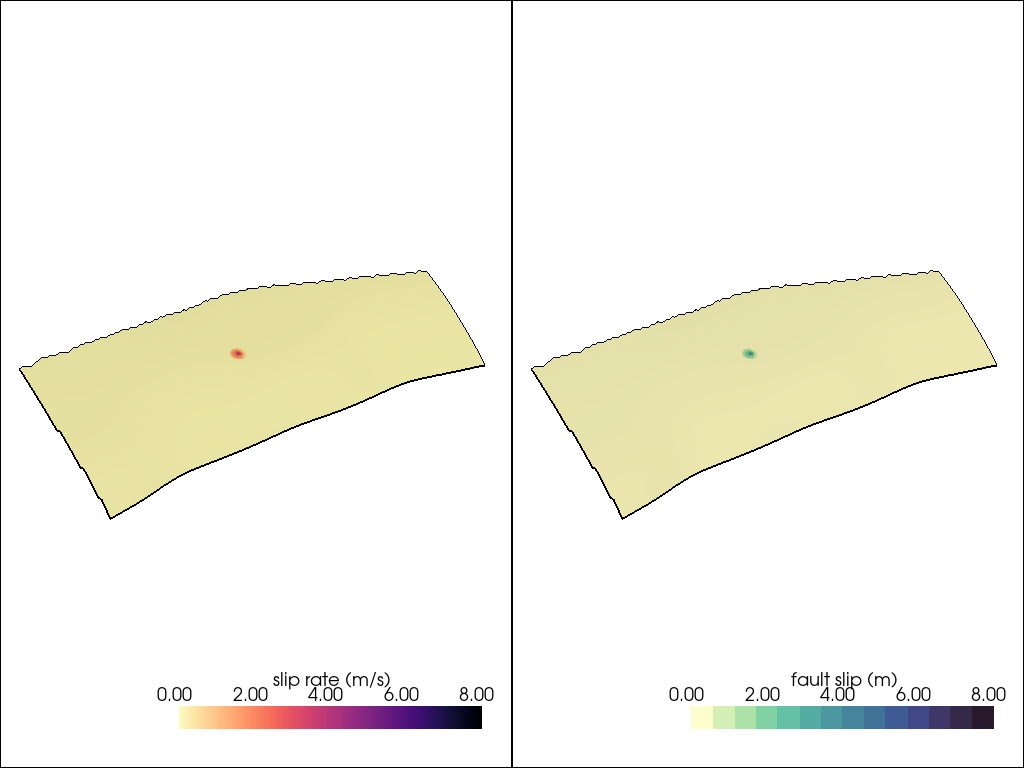

In [29]:

for i in range(0,1):
    exec(f"TrialFaultMesh['slip rate (m/s)'] = sr{i}[0]")
    exec(f"TrialFaultMesh['fault slip (m)'] = asl{i}[0]")
    
    
    pl = pv.Plotter(shape=(1, 1))
#     pl.subplot(0,0)

    cscale = [0,8.0]

    # pl.add_mesh(TrialFaultMesh)
#     pl.add_mesh(TrialFaultMesh, scalars="slip rate (m/s)", clim=cscale, cmap = 'magma_r')
#     pl.add_mesh(fault_edges,color='black',line_width=1.5)

#     pl.camera.view_angle = 25
#     pl.camera.azimuth = 45.0
    
# plot slip 
#     pl.subplot(0, 1)
#     cscale = [0,8.0]

#     # pl.add_mesh(TrialFaultMesh)
    actor = pl.add_mesh(TrialFaultMesh, scalars="fault slip (m)", clim=cscale, cmap = Cmap2)
    pl.add_mesh(fault_edges,color='black',line_width=1.5)

    pl.camera.view_angle = 25
    pl.camera.azimuth = 45.0
    
    pl.show(screenshot='fig-asl-'+ modelname + '-' + str(i) +'.png',jupyter_backend="static")


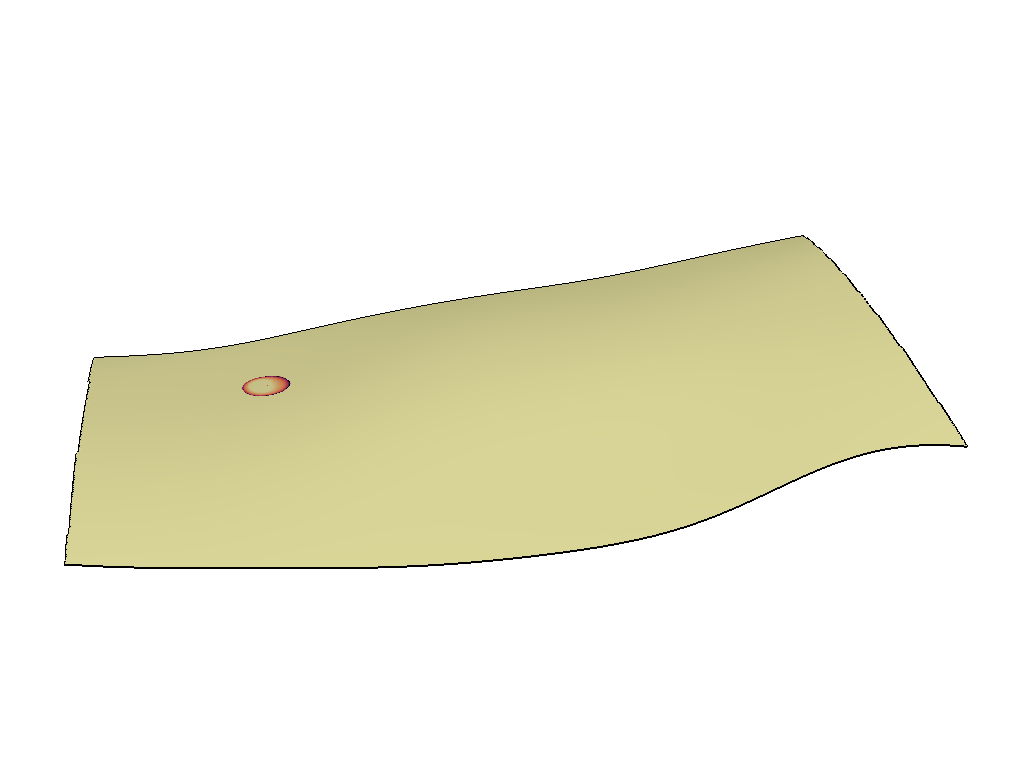

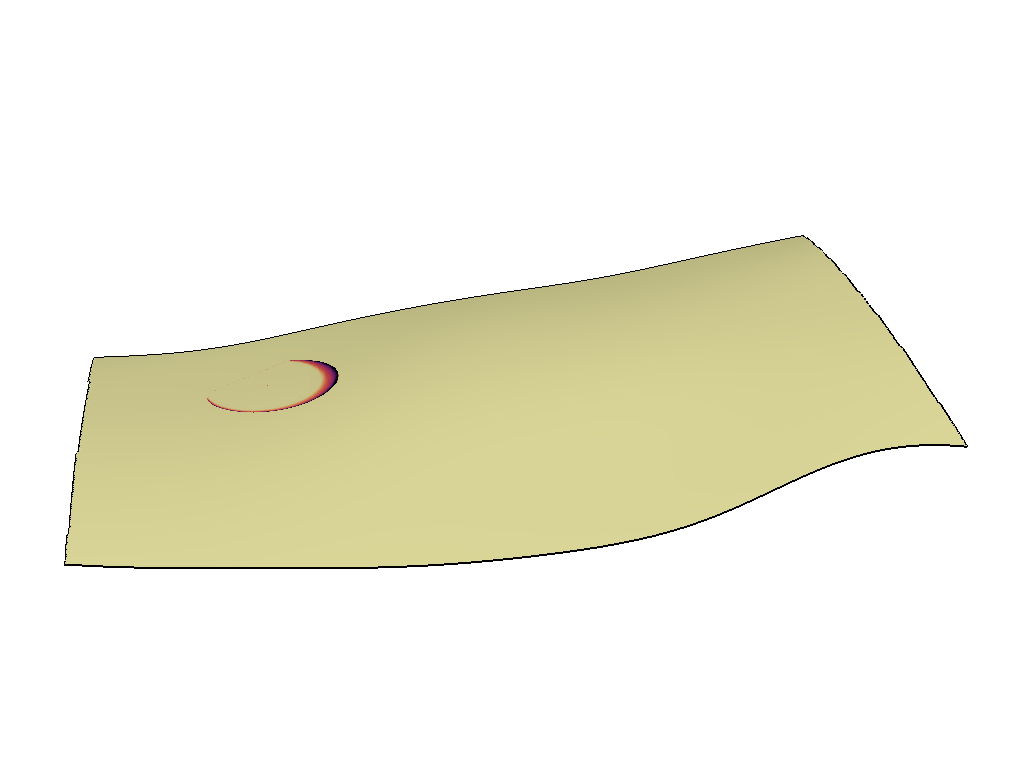

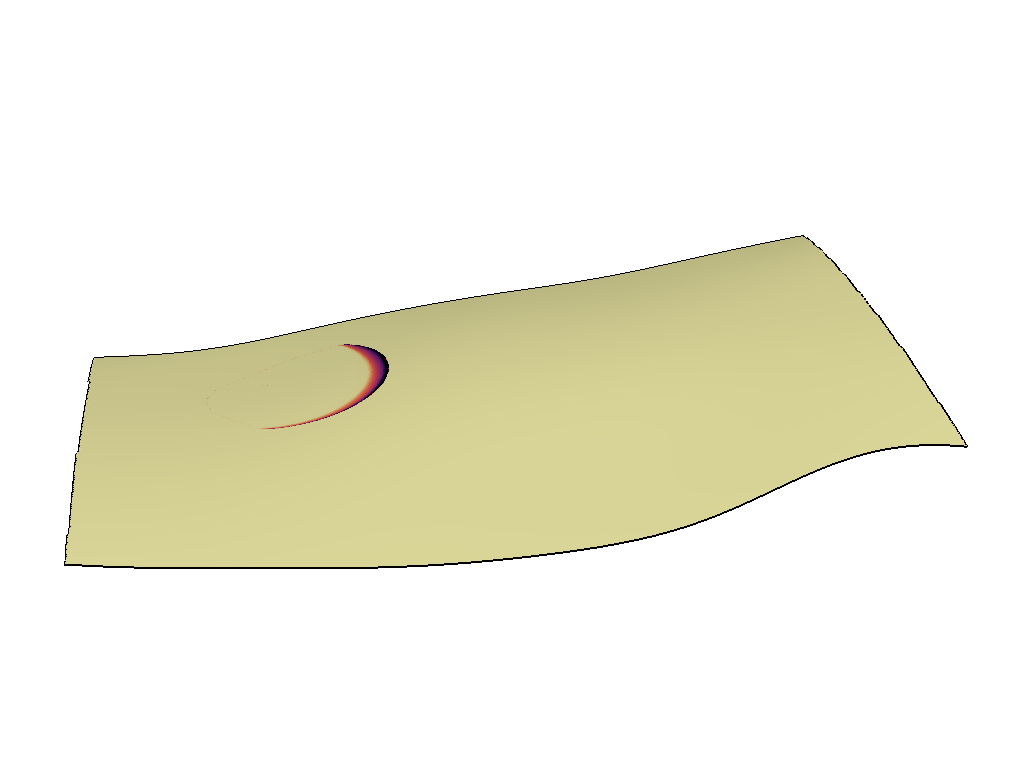

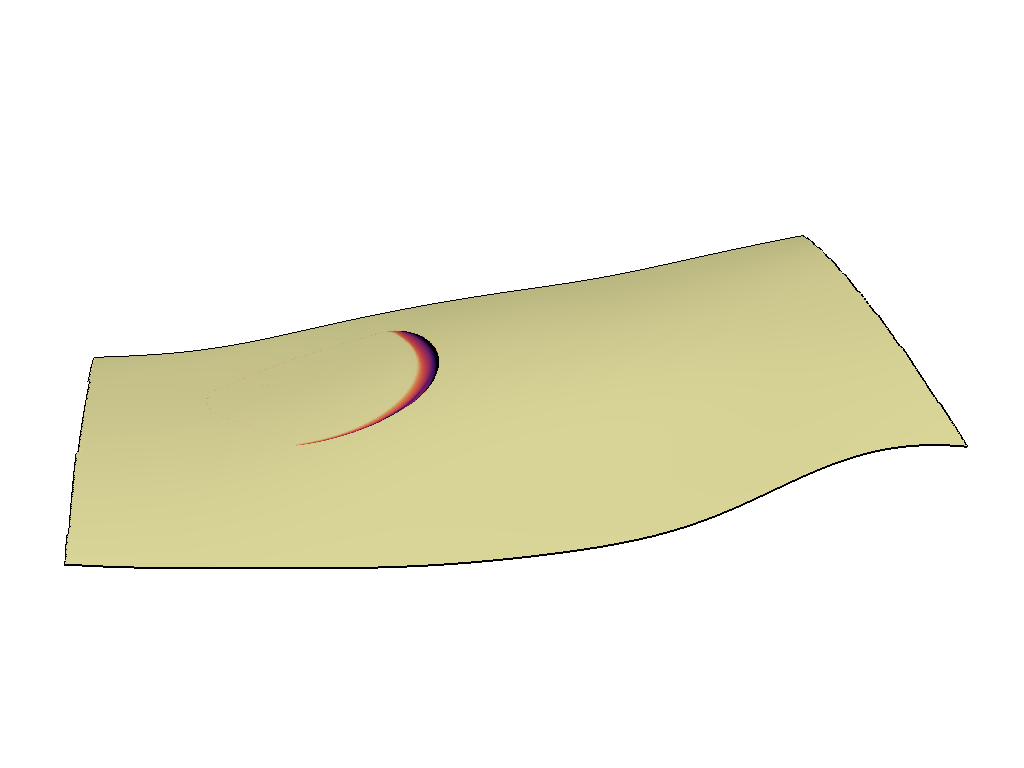

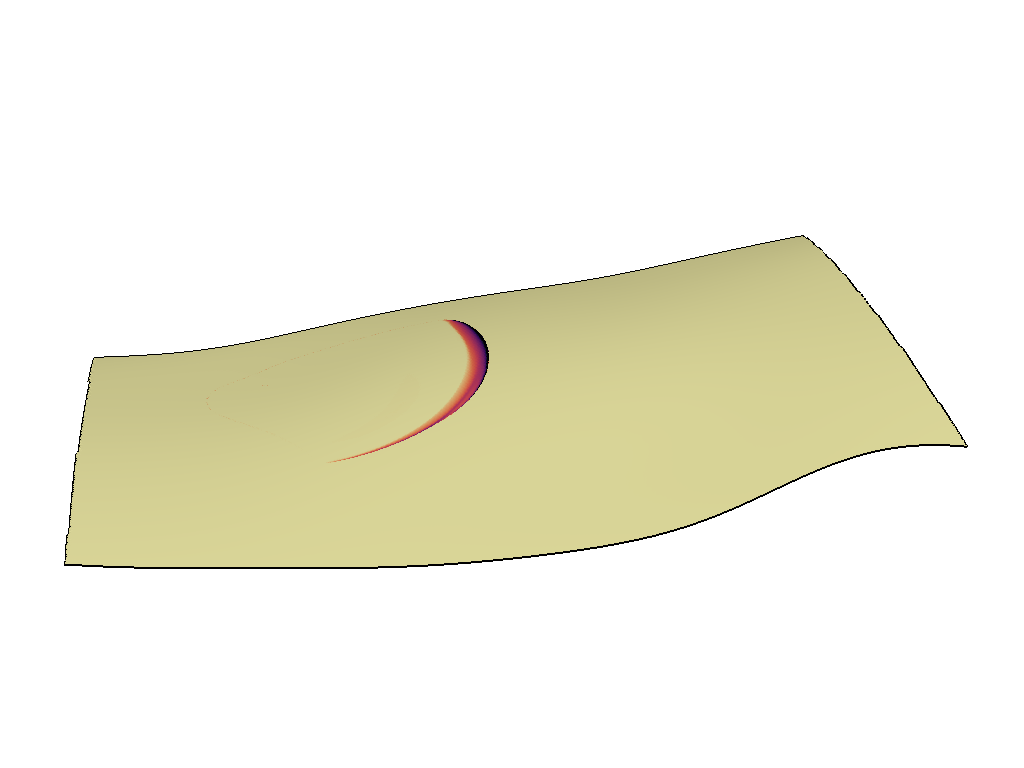

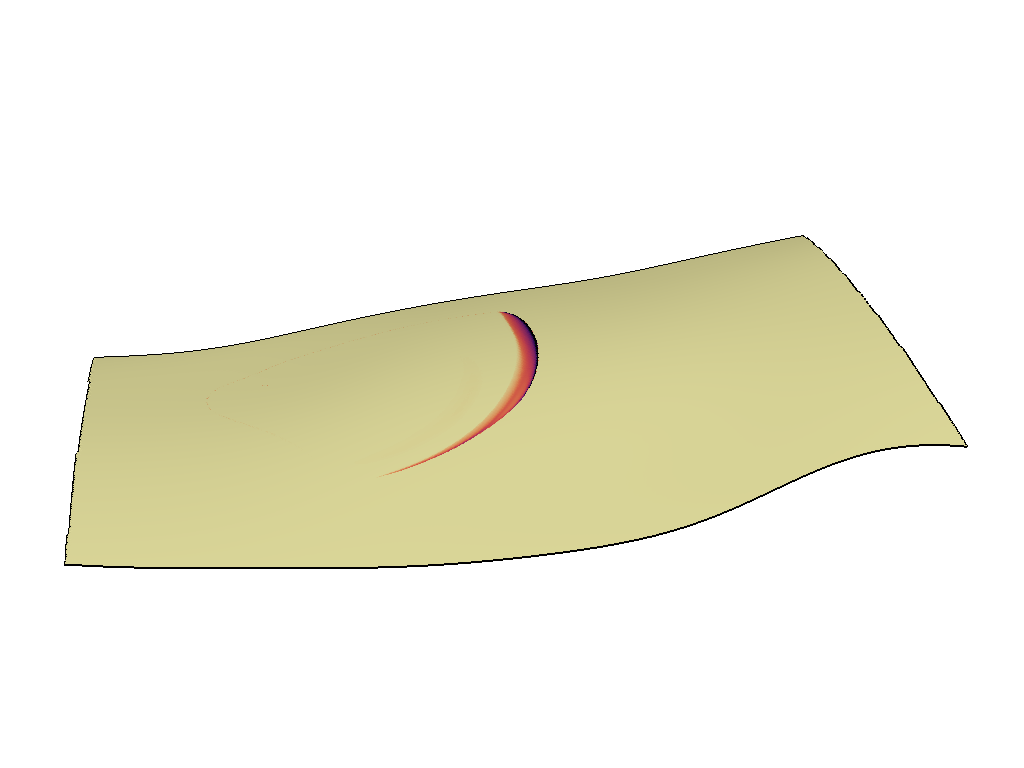

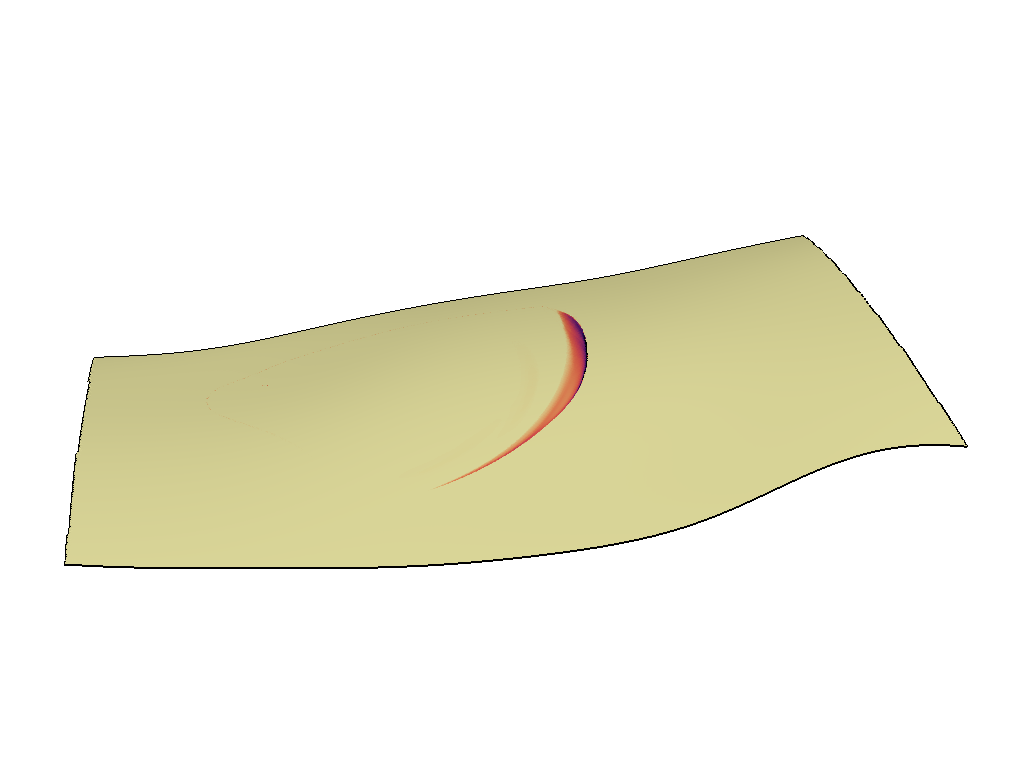

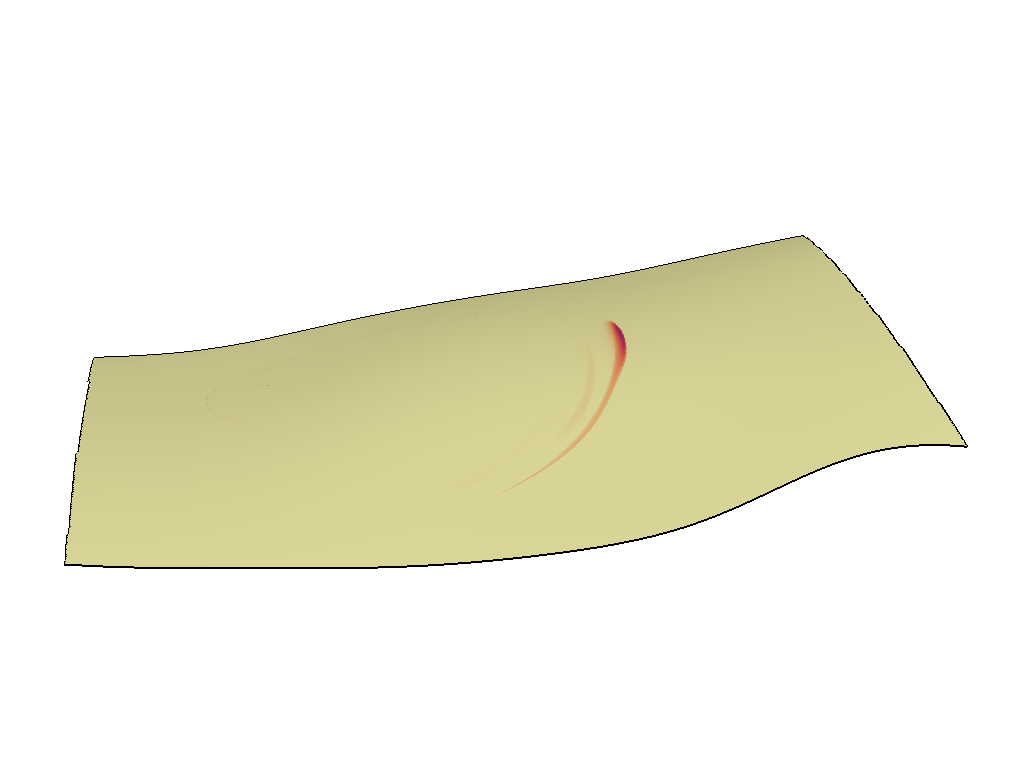

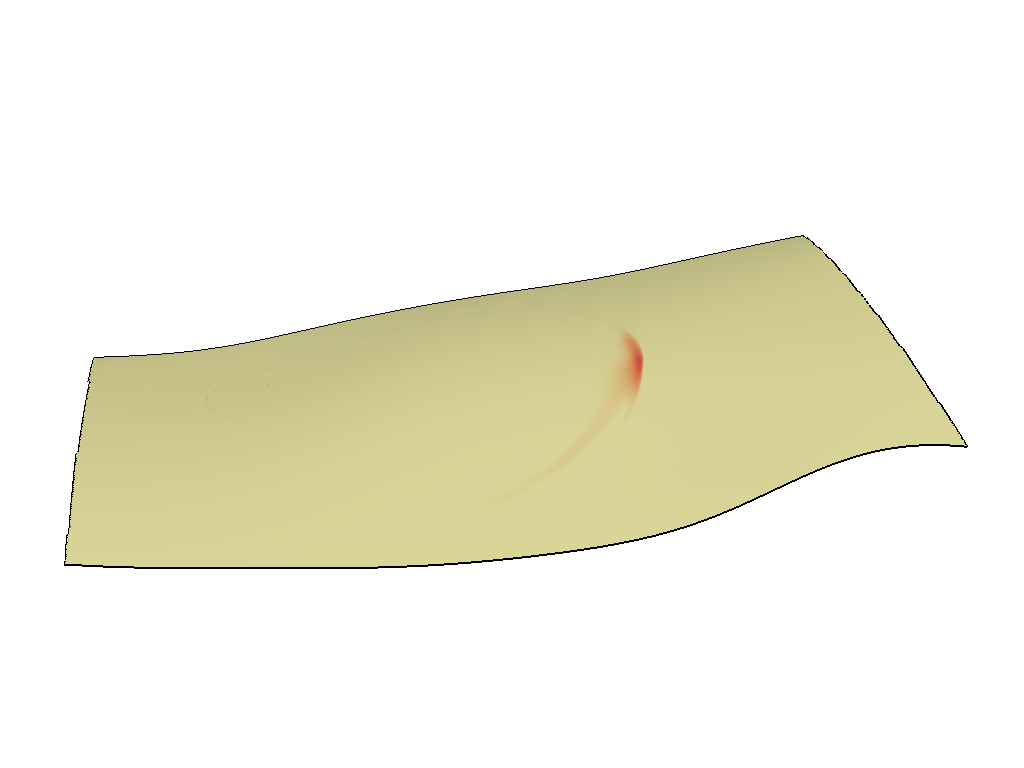

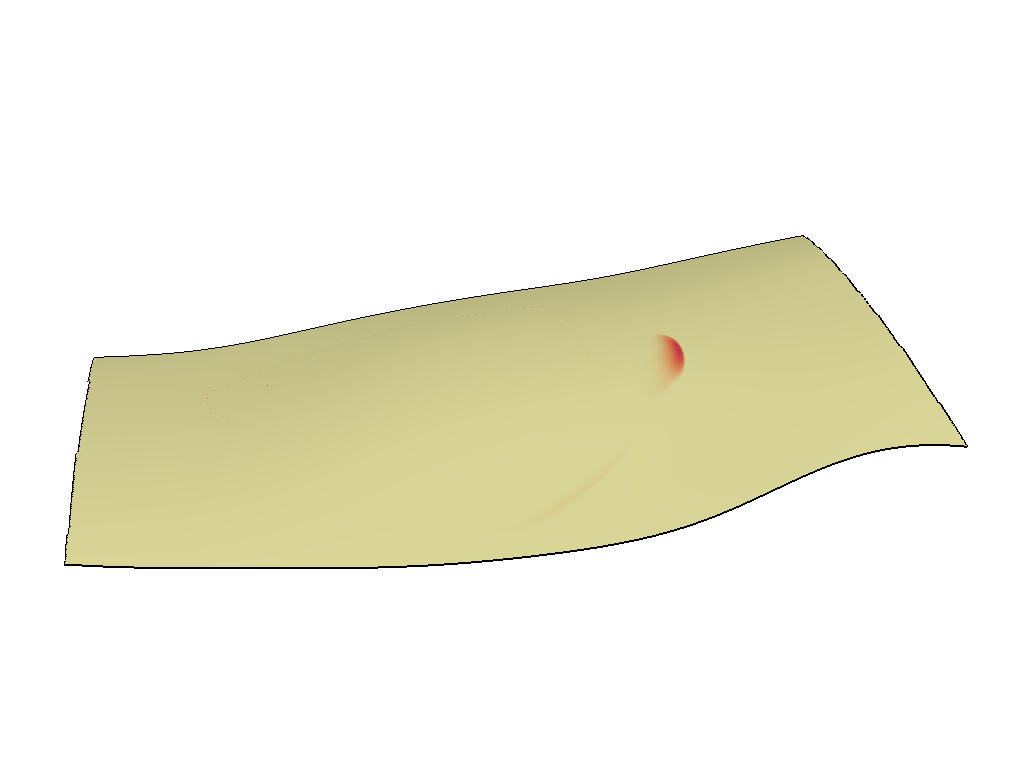

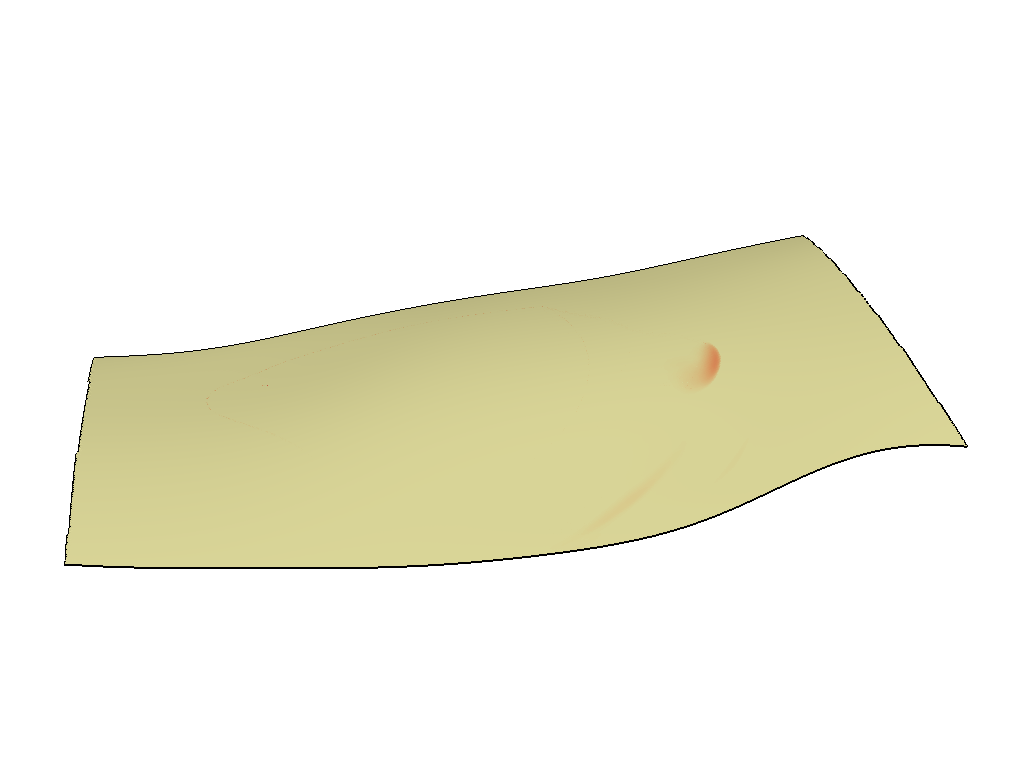

In [24]:

for i in range(0,11):
    
    exec(f"TrialFaultMesh['slip rate (m/s)'] =  sr{i}[0]")
#     exec(f"TrialFaultMesh['fault slip (m)'] =  asl{i}[0]")
    cscale = [0,4.0]

    pl = pv.Plotter()
    # pl.add_mesh(TrialFaultMesh)
    pl.add_mesh(TrialFaultMesh,scalars="slip rate (m/s)", clim=cscale, cmap = 'magma_r', show_scalar_bar=False)
    pl.add_mesh(fault_edges,color='black',line_width=1.5)

    pl.camera.view_angle = 18
    pl.camera.azimuth = -120.0
    pl.show(screenshot='Movie-SR/fig-sr'+  str(i)+ '-' + modelname + '-'  +'.png',jupyter_backend="static")

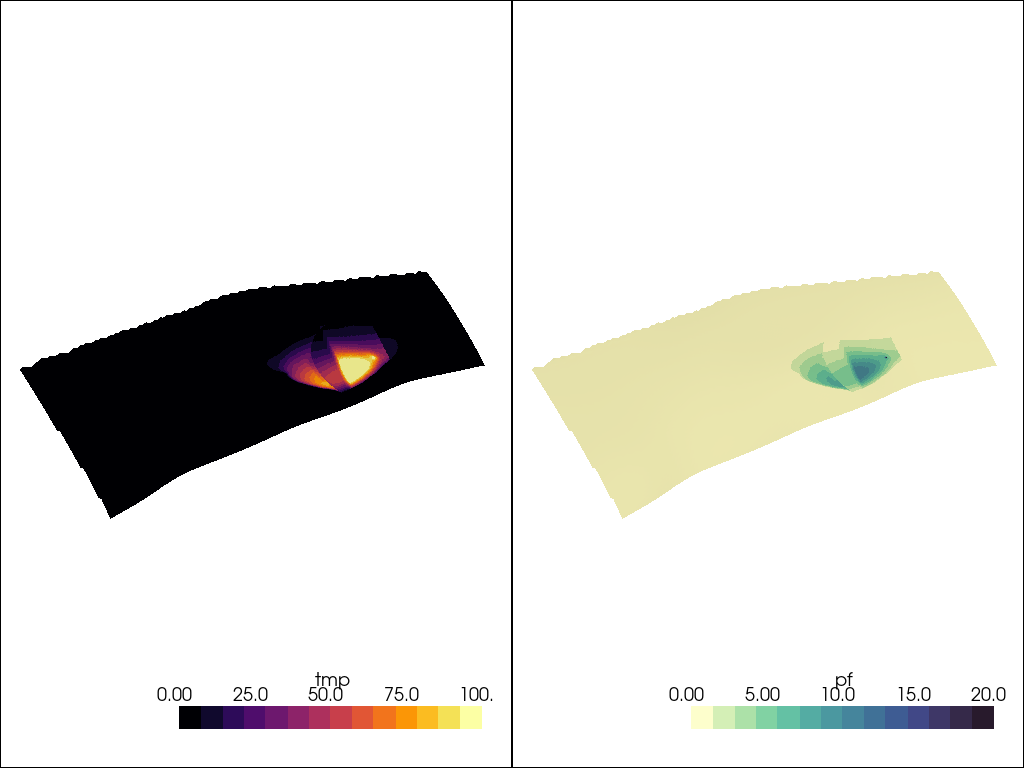

In [47]:
TrialFaultMesh["tmp"] = tmp[0] - 483
TrialFaultMesh["pf"] = -pf[0]/1e6


pl = pv.Plotter(shape=(1, 2))

cscale = [0,100]

pl.add_mesh(TrialFaultMesh,scalars="tmp", clim=cscale, cmap = Cmap)
pl.camera.view_angle = 25
pl.camera.azimuth = 45.0

cscale = [0,20]

pl.subplot(0, 1)
pl.add_mesh(TrialFaultMesh.copy(),scalars="pf", clim=cscale, cmap = Cmap2)
pl.add_mesh(fault_edges,color='black',line_width=1.5)

pl.camera.view_angle = 25
pl.camera.azimuth = 45.0


# ##################################################################################################################
# _ = pl.add_axes(line_width=1)
# actor = pl.add_text("Strike: {}, Dip: {}, Rake: {}".format(OptimalStress['strike'],OptimalStress['dip'], OptimalStress['rake']),
#                      position='upper_right', color='white', shadow=True, font_size=14)

# OutFolderPath='/home/nico/Documents/Extra/Programming/EQ_modeling_Scripts/Qinghai/Output/HomogeneousStress/' + \
#               'HomogeneousStressTEST-{}-{}-{}.png'.format(OptimalStress['strike'],OptimalStress['dip'], OptimalStress['rake'])

pl.show(screenshot='fig-tmp-pf-' + modelname + '.png',jupyter_backend="static")

In [20]:
# plot residual shear stress
pn0 = LoadData(xdmfFilename,'Pn0',connect.shape[0],idt=ndt-1,oneDtMem=True,firstElement=-1)
td0 = LoadData(xdmfFilename,'Td0',connect.shape[0],idt=0,oneDtMem=True,firstElement=-1)
td1 = LoadData(xdmfFilename,'Td0',connect.shape[0],idt=ndt-1,oneDtMem=True,firstElement=-1)

risd_ratio = -td1[0]/pn0[0]

stressd = (td0[0]-td1[0])/1e6

In [39]:
## plot parameters d_c; circular asperity

centers = (xyz[connect[:,0]] + xyz[connect[:,1]] + xyz[connect[:,2]])/3.

r = np.sqrt(np.power(centers[:,0]-1433876.0,2.0)+np.power(centers[:,1]+1927693.0,2.0)+np.power(centers[:,2]+30786.0,2.0));
r_crit0 = 5000.0;
r_crit = 10000.0;
a = (r-r_crit0)/r_crit

# r2 = np.sqrt(np.power(centers[:,0]-1.5419e6,2.0)+np.power(centers[:,1]+1.87e6,2.0)+np.power(centers[:,2]+18000.0,2.0));
r2 = np.sqrt(np.power(centers[:,0]-1.603439e6,2.0)+np.power(centers[:,1]+1.91448e6,2.0)+np.power(centers[:,2]+15679.0,2.0));
r_crit0 = 5000.0;
r_crit = 10000.0;
a2 = (r2-r_crit0)/r_crit


r3 = np.sqrt(np.power(centers[:,0]-1.678439e6,2.0)+np.power(centers[:,1]+1.86448e6,2.0)+np.power(centers[:,2]+15679.0,2.0));
r_crit0 = 5000.0;
r_crit = 10000.0;
a3 = (r2-r_crit0)/r_crit

alpha1 = np.where(a<1.0,a,1.0)
alpha = np.where(alpha1>0.0,alpha1,0.0)

beta1 = np.where(r0>0.3,r0, 0.1 )
beta2 = 0.8-beta1

rs_l0 = 0.2-0.1*alpha
wf = rs_l0-rs_l0+0.1
alphy_hy = rs_l0-rs_l0+1e-5

dd = np.where(r>90000.0)
dd2 = np.where(r2<55000.0)
dd3 = np.where(r3<55000.0)

dd4 = np.where(r< 100000.0)


rs_l0[dd] = 0.8 
rs_l0[dd2] = 0.1 
rs_l0[dd3] = 0.1 


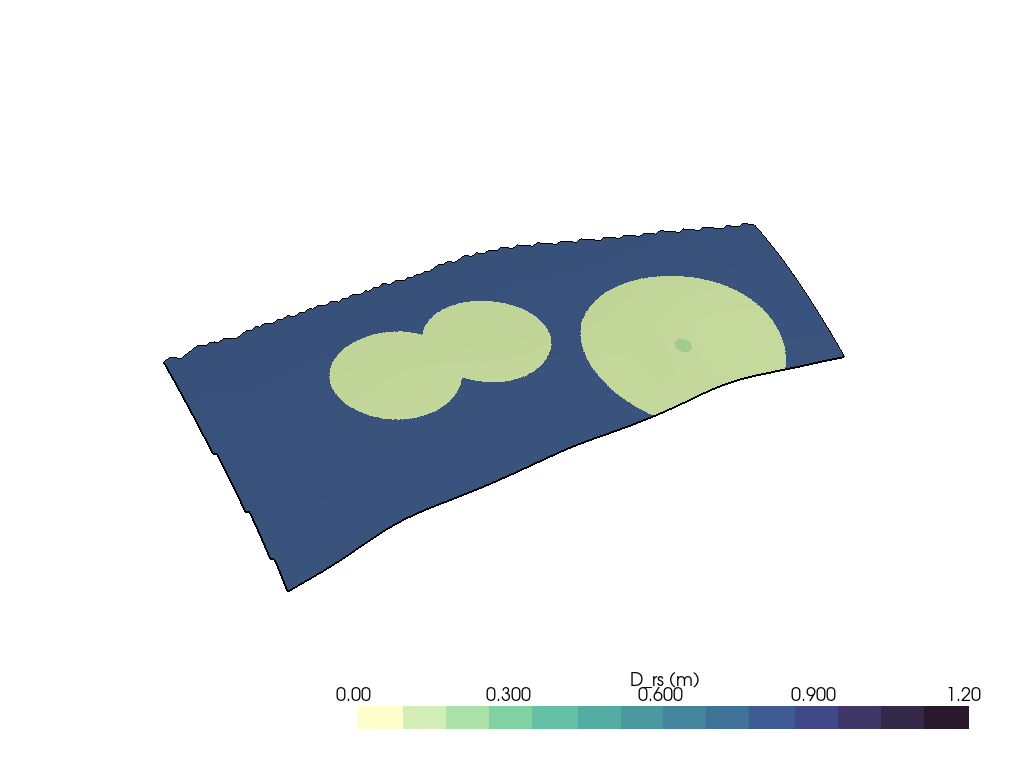

In [45]:
# plot circular-asperity model
TrialFaultMesh["D_rs (m)"] = rs_l0

pl = pv.Plotter(shape=(1, 1))

cscale = [0,1.2]

pl.add_mesh(TrialFaultMesh,scalars="D_rs (m)", clim=cscale, cmap = Cmap2)
pl.add_mesh(fault_edges,color='black',line_width=1.5)

pl.camera.view_angle = 25
pl.camera.azimuth = 45.0

# ##################################################################################################################
# _ = pl.add_axes(line_width=1)
# actor = pl.add_text("Strike: {}, Dip: {}, Rake: {}".format(OptimalStress['strike'],OptimalStress['dip'], OptimalStress['rake']),
#                      position='upper_right', color='white', shadow=True, font_size=14)

# OutFolderPath='/home/nico/Documents/Extra/Programming/EQ_modeling_Scripts/Qinghai/Output/HomogeneousStress/' + \
#               'HomogeneousStressTEST-{}-{}-{}.png'.format(OptimalStress['strike'],OptimalStress['dip'], OptimalStress['rake'])

pl.show(screenshot='fig-Lf-circ' + modelname + '.png',jupyter_backend="static")

In [46]:
## plot parameters d_c segments and TP parameters segment

centers = (xyz[connect[:,0]] + xyz[connect[:,1]] + xyz[connect[:,2]])/3.

ac = 2.85
bc = 1
cc = -2.05e6
yx = ac * centers[:,0]+ bc*centers[:,1] + cc

alpha = np.zeros(yx.shape)+1e-5
wf_l0 = np.zeros(yx.shape)+0.035


dd = np.where(centers[:,2]>-14.0e3)
alpha[dd] = 1e-5
wf[dd] = 0.024

dd = np.where(yx<0.25e6)
alpha[dd] = 1e-5
wf[dd] = 0.035

dd = np.where(yx>0.85e6)
alpha[dd] = 1e-8
wf[dd] = 0.1




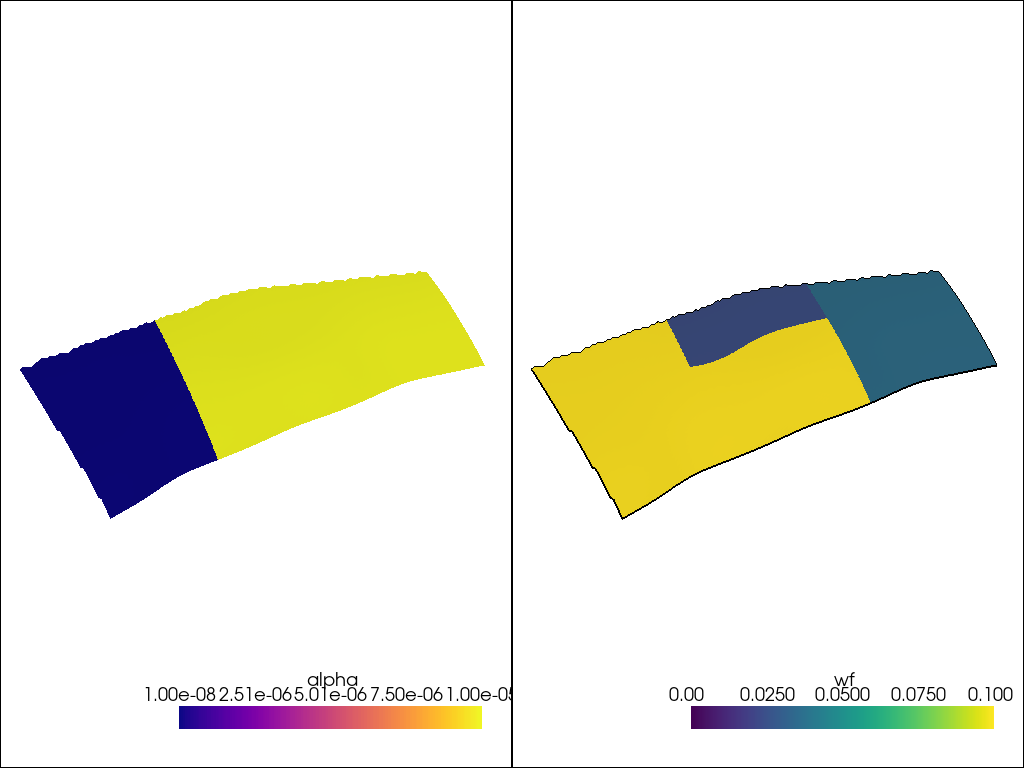

In [48]:
# plot circular-asperity model

TrialFaultMesh["alpha"] = alpha
TrialFaultMesh["wf"] = wf


pl = pv.Plotter(shape=(1, 2))

cscale = [1e-8,1e-5]

pl.add_mesh(TrialFaultMesh,scalars="alpha", clim=cscale, cmap = 'plasma')
pl.camera.view_angle = 25
pl.camera.azimuth = 45.0

cscale = [0,0.1]

pl.subplot(0, 1)
pl.add_mesh(TrialFaultMesh.copy(),scalars="wf", clim=cscale, cmap = 'viridis')
pl.add_mesh(fault_edges,color='black',line_width=1.5)

pl.camera.view_angle = 25
pl.camera.azimuth = 45.0


# ##################################################################################################################
# _ = pl.add_axes(line_width=1)
# actor = pl.add_text("Strike: {}, Dip: {}, Rake: {}".format(OptimalStress['strike'],OptimalStress['dip'], OptimalStress['rake']),
#                      position='upper_right', color='white', shadow=True, font_size=14)

# OutFolderPath='/home/nico/Documents/Extra/Programming/EQ_modeling_Scripts/Qinghai/Output/HomogeneousStress/' + \
#               'HomogeneousStressTEST-{}-{}-{}.png'.format(OptimalStress['strike'],OptimalStress['dip'], OptimalStress['rake'])

pl.show(screenshot='fig-alphy-wf' + modelname + '.png',jupyter_backend="static")

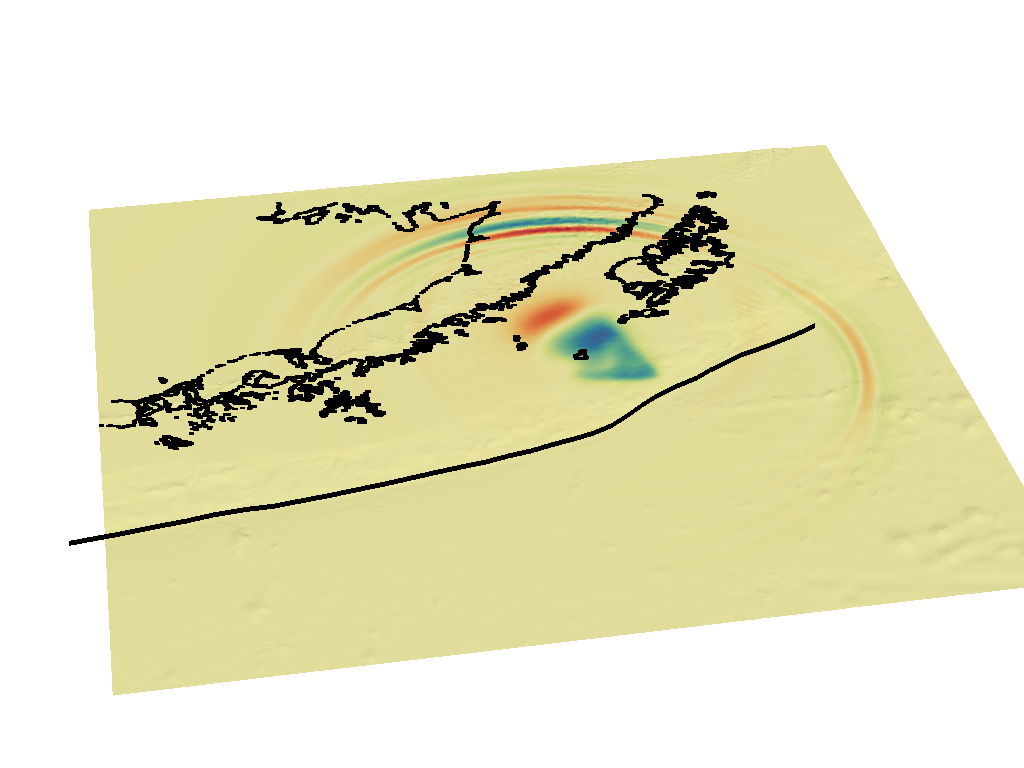

In [238]:
modelname = 'rup43b-lg'
# create mesh file
foldername = 'result1938/'

SurfMeshPath = "./SurfMesh_" + modelname + ".vtk"

# modelname = 'rup9'

xdmfFilename = foldername  +  '/'+  modelname +'-surface.xdmf'

ndt = ReadNdt(xdmfFilename)
TrialSurf_xyz = ReadGeometry(xdmfFilename)
TrialSurf_connect = ReadConnect(xdmfFilename)

u3 = LoadData(xdmfFilename,'W',TrialSurf_connect.shape[0],idt=ndt-1,oneDtMem=True,firstElement=-1)


SurfMesh = meshio.write_points_cells(SurfMeshPath, TrialSurf_xyz, [("triangle",TrialSurf_connect)])
# del FaultMesh

# Load fault mesh onto pyvista
TrialSurfMesh = pv.read(SurfMeshPath)

# extract edge of fault mesh for plotting.
# fault_edges = TrialFaultMesh.extract_feature_edges(boundary_edges=True,feature_edges=True,feature_angle=30)
# fault_edges.clear_data() 

TrialSurfMesh["vertical disp. (m)"] = u3[0]
# TrialFaultMesh["solid"] = asl[0]-asl[0]

cscale = [-1.0,1.0]

pl = pv.Plotter()
# pl.add_mesh(TrialFaultMesh)
pl.add_mesh(TrialSurfMesh,scalars="vertical disp. (m)", clim=cscale, cmap = "spectral", show_scalar_bar=False)
# pl.add_mesh(fault_edges,color='black',line_width=1.5)
# edges.plot(line_width=10)

pl.add_mesh(PointCloud,color='red')
pl.add_mesh(PointCoast,color='black',line_width=0.5)
pl.add_lines(trchxyz.transpose(),connected=True,color='black')

pl.camera.view_angle = 20
pl.camera.azimuth = 215.0
pl.camera.zoom(1.05)
# pl.reset_camera(bounds=[])
pl.show(screenshot='fig-u3-' + modelname +'.png',jupyter_backend="static")

u3_surf= pl.image

<IPython.core.display.Javascript object>


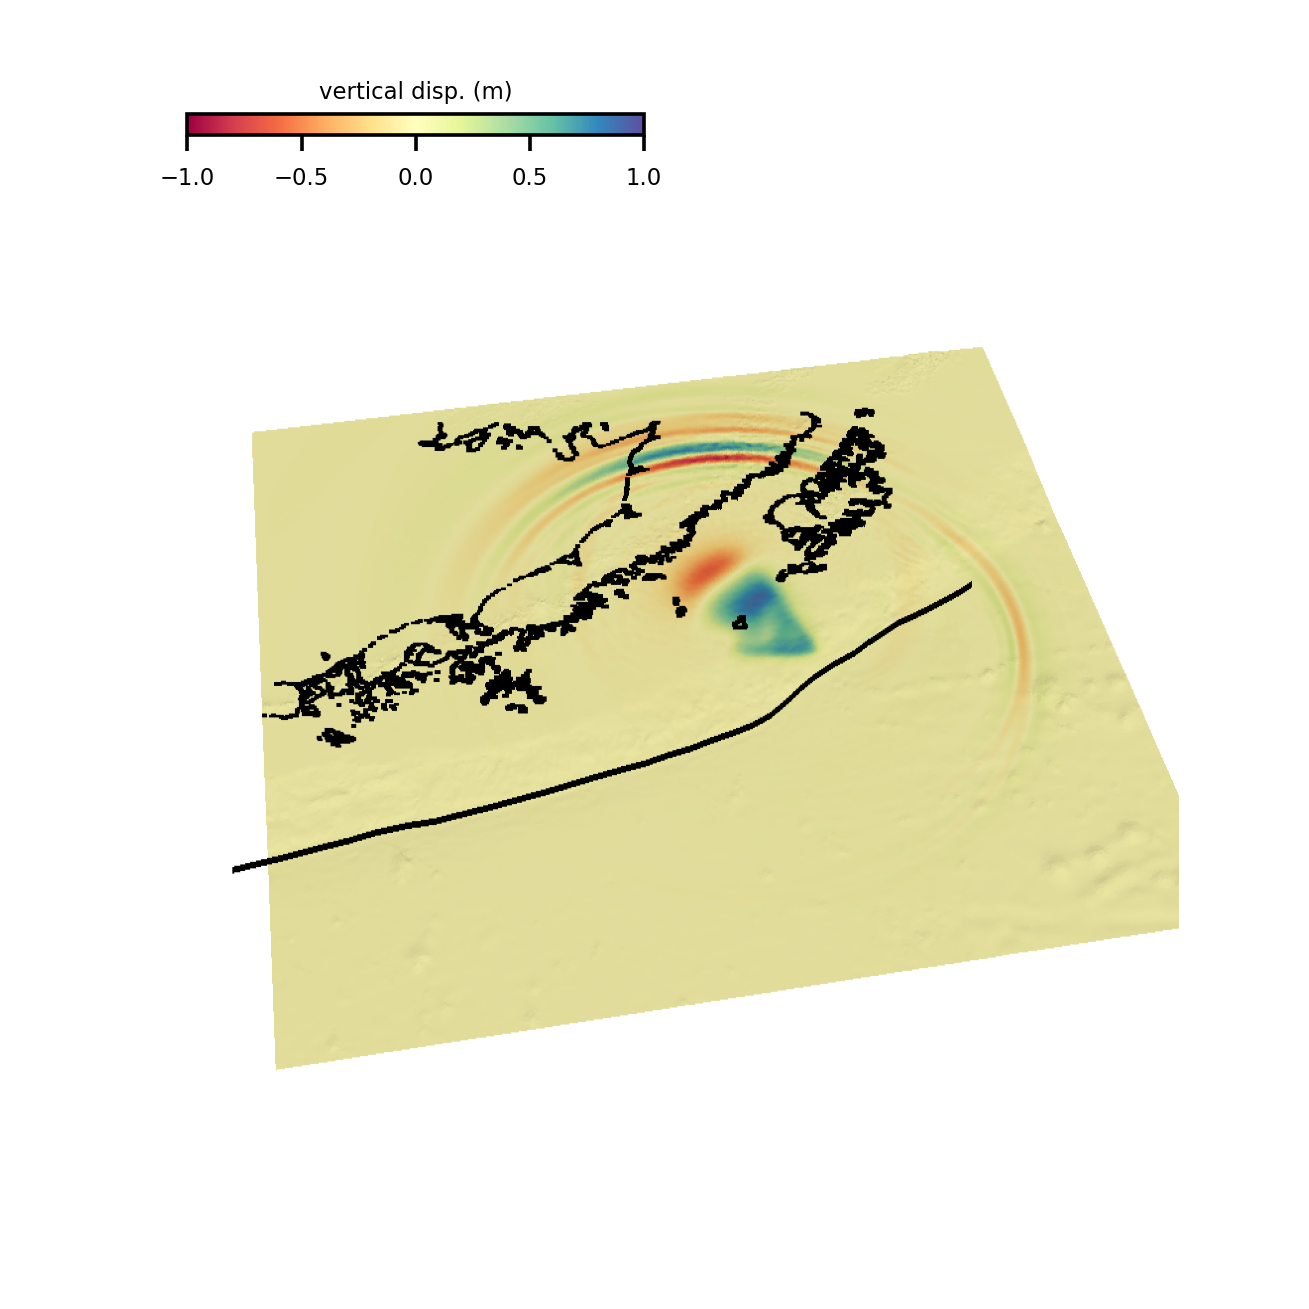

In [241]:

fig = plt.figure(figsize = (4,4),dpi=300)

ax1 = fig.add_subplot(111)

sr_onfault = mpimg.imread('fig-u3-' + modelname +'.png')
cscale = [-1,1.0]

FaultImage = ax1.imshow(sr_onfault,aspect='auto',cmap='Spectral', clim=cscale)
ax1.axis('off')
# ax1.set_title('t=5.0 s',loc='right',size=5)

axins1 = inset_axes(ax1,width='50%',height='3%',
                    loc='lower left',bbox_to_anchor=(0.001, 0.999, 0.9,0.7),bbox_transform=ax1.transAxes)

cs= fig.colorbar(FaultImage,shrink=0.3,cax=axins1,orientation="horizontal")

axins1.set_xlabel('vertical disp. (m)',size=5,labelpad=-24)
axins1.set_xlim([-1.0,1.0])
axins1.set_xticks([-0,1.0,1.0],minor=True)
axins1.tick_params(labelsize=5.)

fig.savefig('snaps-u3-' + modelname +'.png',dpi=300)


<IPython.core.display.Javascript object>


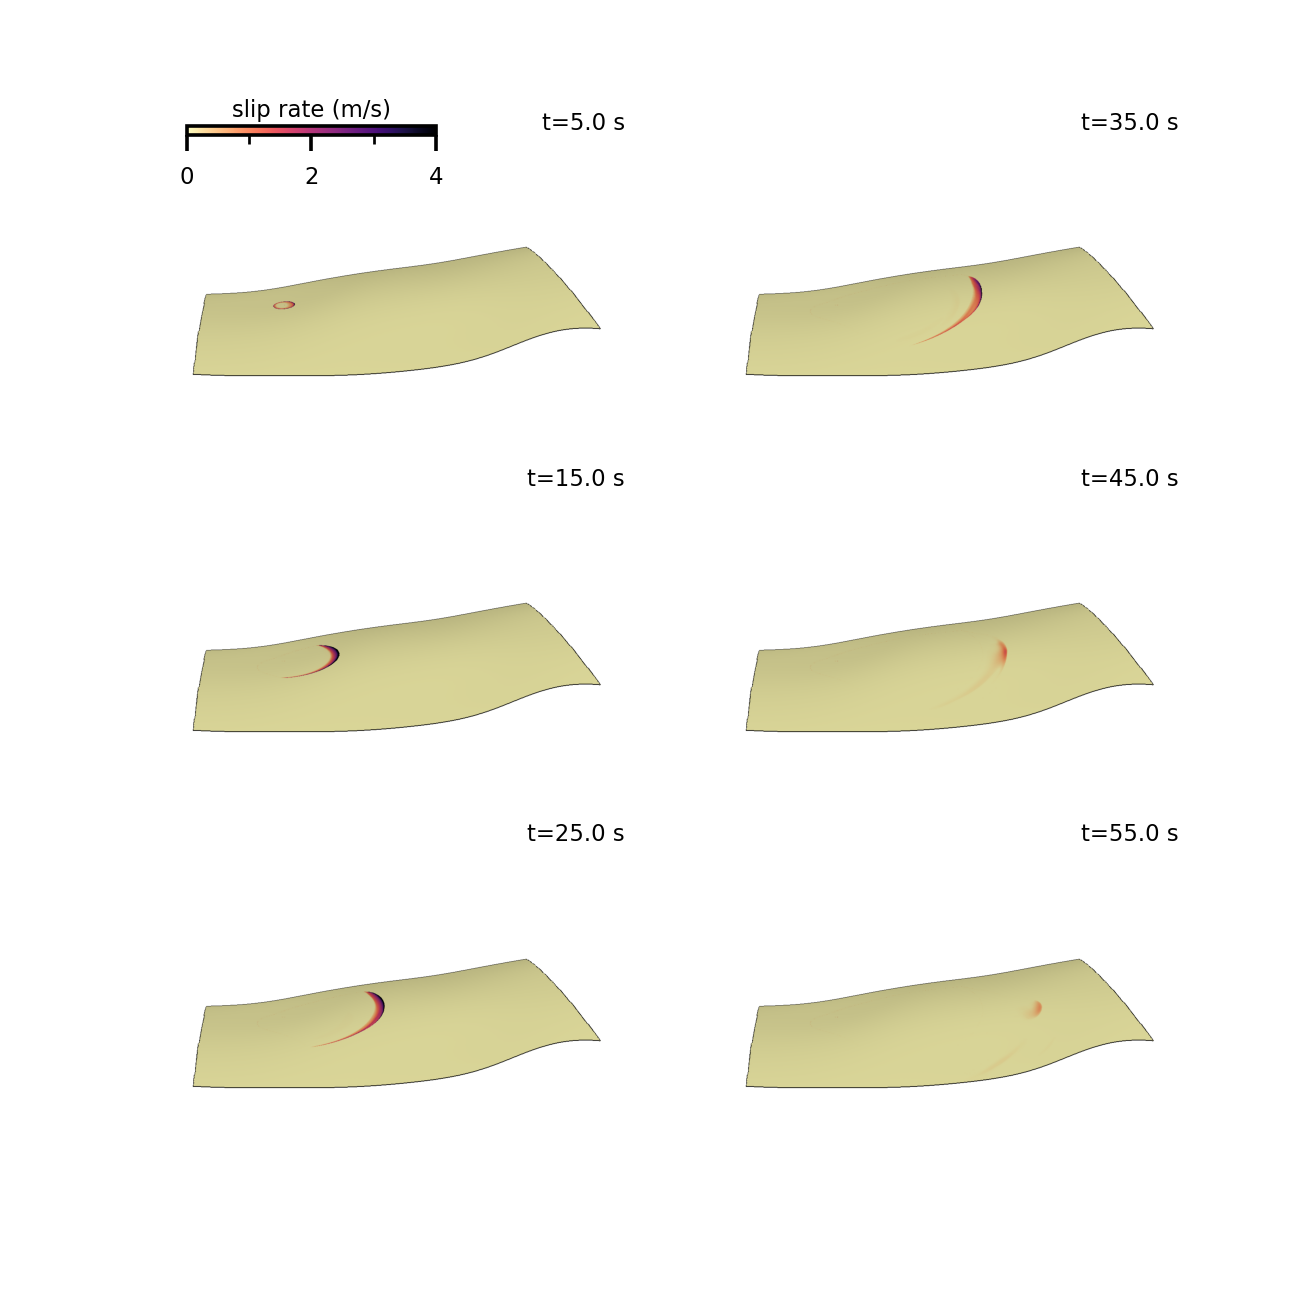

In [25]:
# laod png and plot 
# import matplotlib.image as mpimg

modelname = 'alkR057-TP72f'

fig = plt.figure(figsize = (4,4),dpi=300)

ax1 = fig.add_subplot(3,2,1)

sr_onfault = mpimg.imread('Movie-SR/fig-sr0-' + modelname +'-.png')
cscale = [0,4.0]

FaultImage = ax1.imshow(sr_onfault,aspect='auto',cmap='magma_r', clim=cscale)
ax1.axis('off')
ax1.set_title('t=5.0 s',loc='right',size=5)

axins1 = inset_axes(ax1,width='60%',height='4%',
                    loc='lower left',bbox_to_anchor=(0.001, 0.999, 0.9,0.7),bbox_transform=ax1.transAxes)

cs= fig.colorbar(FaultImage,shrink=0.3,cax=axins1,orientation="horizontal")

axins1.set_xlabel('slip rate (m/s)',size=5,labelpad=-20)
axins1.set_xlim([0,4.0])
axins1.set_xticks([0,1.0,2.0,3.0,4.0],minor=True)
axins1.tick_params(labelsize=5.)

ax2 = fig.add_subplot(3,2,3)
sr1_onfault = mpimg.imread('Movie-SR/fig-sr2-' + modelname +'-.png')
FaultImage = ax2.imshow(sr1_onfault,aspect='auto',cmap='magma_r', clim=cscale)
ax2.axis('off')
ax2.set_title('t=15.0 s',loc='right',size=5)


ax3 = fig.add_subplot(3,2,5)
sr2_onfault = mpimg.imread('Movie-SR/fig-sr4-' + modelname +'-.png')
FaultImage = ax3.imshow(sr2_onfault,aspect='auto',cmap='magma_r', clim=cscale)
ax3.axis('off')
ax3.set_title('t=25.0 s',loc='right',size=5)


ax4 = fig.add_subplot(3,2,2)
sr_onfault = mpimg.imread('Movie-SR/fig-sr6-' + modelname +'-.png')
FaultImage = ax4.imshow(sr_onfault,aspect='auto',cmap='magma_r', clim=cscale)
ax4.axis('off')
ax4.set_title('t=35.0 s',loc='right',size=5)

ax5 = fig.add_subplot(3,2,4)
sr1_onfault = mpimg.imread('Movie-SR/fig-sr8-' + modelname +'-.png')
FaultImage = ax5.imshow(sr1_onfault,aspect='auto',cmap='magma_r', clim=cscale)
ax5.axis('off')
ax5.set_title('t=45.0 s',loc='right',size=5)


ax6 = fig.add_subplot(3,2,6)
sr2_onfault = mpimg.imread('Movie-SR/fig-sr10-' + modelname +'-.png')
FaultImage = ax6.imshow(sr2_onfault,aspect='auto',cmap='magma_r', clim=cscale)
ax6.axis('off')
ax6.set_title('t=55.0 s',loc='right',size=5)




fig.savefig('snaps-sr-' + modelname +'.png',dpi=300)